### Problem Statement

#### Demographers analyze income data to study demographic changes and their societal impact. Migration patterns often correlate with income level shifts. To understand which individuals are more likely to migrate based on income, we seek a solution to classify whether an adult's income exceeds $50k

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import xgboost as xgb
from sklearn.metrics import f1_score

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset

In [3]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#### Shape of the data


In [4]:
data.shape

(32561, 15)

### Exploratory Data Analysis

#### Handling Missing Values

In [5]:
data.dropna(inplace=True)

#### Filling in missing values

In [6]:
data=data.fillna(method='bfill', axis=0).fillna(0).head()

#### Removing duplicate values

In [7]:
new_data = data.drop_duplicates()

In [8]:
data = pd.read_csv('adult.csv')
data = data.dropna()
data = data.fillna(method='bfill', axis=0).fillna(0)
data = data[data['workclass'] != '?']
data = data[data['occupation'] != '?']
new_data = data.drop_duplicates()

In [9]:
new_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### Shape of the data


In [10]:
new_data.shape

(30694, 15)

### Reading dataset

In [11]:
data = pd.read_csv('adult.csv')
data = data.dropna()
data = data.fillna(method='bfill', axis=0).fillna(0)
data = data[data['workclass'] != '?']
data = data[data['occupation'] != '?']
new_data = data.drop_duplicates()

### Splitting the data


In [12]:
X = new_data.drop('income', axis=1)
new_data['income'] = new_data['income'].apply(lambda x: 0 if x == '<=50K' else 1)
y = new_data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Encoding the data

In [13]:
X =new_data.drop('income', axis=1)
y = new_data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)
X_test_encoded['native.country_Holand-Netherlands'] = 0

X_test_encoded = X_test_encoded[X_train_encoded.columns].copy() 

### Parameter check

In [14]:
def parcheck_train(model,X_train_encoded, y_test):

    y_pred_train = model.predict(X_train_encoded)
    accuracy = accuracy_score(y_train, y_pred_train)
    confusion = confusion_matrix(y_train, y_pred_train)
    classification_rep = classification_report(y_train, y_pred_train)
    print("Accuracy on training data:", accuracy)
    print("Confusion Matrix on training data:\n", confusion)
    print("Classification Report on training data:\n", classification_rep)

def parcheck_test(model,X_test_encoded, y_test):

    y_pred = model.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print("Accuracy on test data:", accuracy)
    print("Confusion Matrix on test data:\n", confusion)
    print("Classification Report on test data:\n", classification_rep)

### Random Forest Classification Model

In [15]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=12)
rf_classifier.fit(X_train_encoded, y_train)

# predictions on the training data
y_pred_train = rf_classifier.predict(X_train_encoded)

#model performance on the training data
parcheck_train(rf_classifier, X_train_encoded, y_train)

#model performance on the test data
parcheck_test(rf_classifier, X_test_encoded, y_test)



Accuracy on training data: 0.8663815923437181
Confusion Matrix on training data:
 [[17624   723]
 [ 2558  3650]]
Classification Report on training data:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     18347
           1       0.83      0.59      0.69      6208

    accuracy                           0.87     24555
   macro avg       0.85      0.77      0.80     24555
weighted avg       0.86      0.87      0.86     24555

Accuracy on test data: 0.8634956833360482
Confusion Matrix on test data:
 [[4503  196]
 [ 642  798]]
Classification Report on test data:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91      4699
           1       0.80      0.55      0.66      1440

    accuracy                           0.86      6139
   macro avg       0.84      0.76      0.79      6139
weighted avg       0.86      0.86      0.85      6139



### XGBoost Model

In [16]:
xgb_classifier = xgb.XGBClassifier(random_state=42,max_depth=3,n_estimators=50)
xgb_classifier.fit(X_train_encoded, y_train)

y_pred = xgb_classifier.predict(X_train_encoded)

#model performance on the training data
parcheck_train(xgb_classifier, X_train_encoded, y_train)

#model performance on the test data
parcheck_test(xgb_classifier, X_test_encoded, y_test)

Accuracy on training data: 0.8684178375076359
Confusion Matrix on training data:
 [[17351   996]
 [ 2235  3973]]
Classification Report on training data:
               precision    recall  f1-score   support

           0       0.89      0.95      0.91     18347
           1       0.80      0.64      0.71      6208

    accuracy                           0.87     24555
   macro avg       0.84      0.79      0.81     24555
weighted avg       0.86      0.87      0.86     24555

Accuracy on test data: 0.8750610848672422
Confusion Matrix on test data:
 [[4471  228]
 [ 539  901]]
Classification Report on test data:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4699
           1       0.80      0.63      0.70      1440

    accuracy                           0.88      6139
   macro avg       0.85      0.79      0.81      6139
weighted avg       0.87      0.88      0.87      6139



### Feature Importance

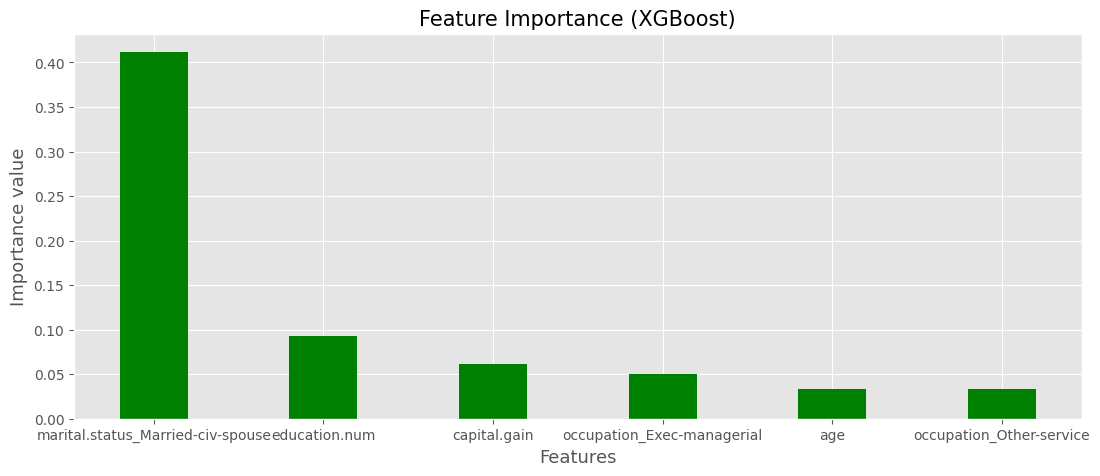

In [17]:
plt.style.use(style='ggplot')

feature_importance = xgb_classifier.feature_importances_
feature_names = X_train_encoded.columns

feature_importance_dict = dict(zip(feature_names, feature_importance))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_n = 6
top_features = [feature[0] for feature in sorted_feature_importance[:top_n]]
top_importance = [feature[1] for feature in sorted_feature_importance[:top_n]]

plt.figure(figsize=(13, 5))
plt.bar(top_features, top_importance, color='green', width=0.4)
plt.xlabel("Features", fontsize=13)
plt.ylabel("Importance value", fontsize=13)
plt.title("Feature Importance (XGBoost)", fontsize=15)
plt.show()


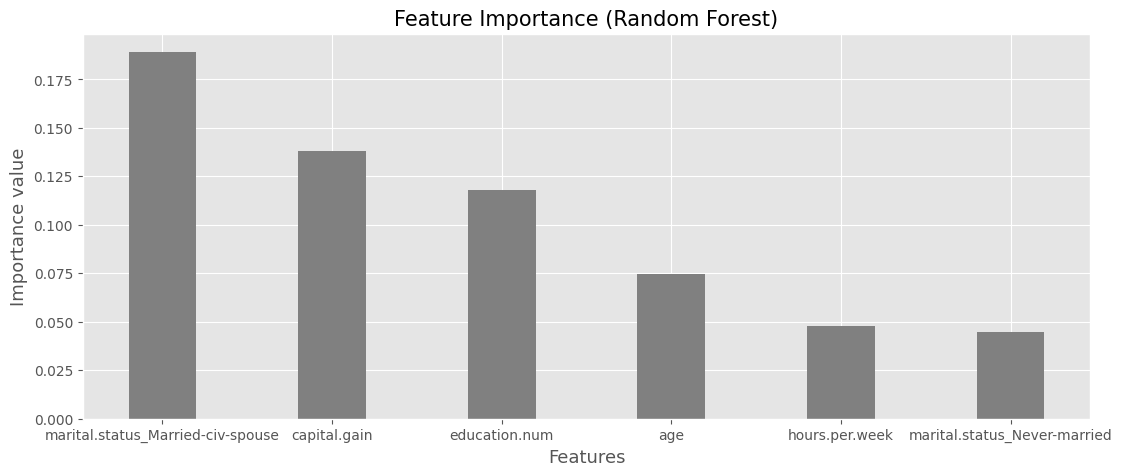

In [18]:
feature_importance = rf_classifier.feature_importances_
feature_names = X_train_encoded.columns

feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_n = 6  

top_features = [feature[0] for feature in sorted_feature_importance[:top_n]]
top_importance = [feature[1] for feature in sorted_feature_importance[:top_n]]

plt.figure(figsize=(13, 5))
plt.bar(top_features, top_importance, color='grey', width=0.4)
plt.xlabel("Features", fontsize=13)
plt.ylabel("Importance value", fontsize=13)
plt.title("Feature Importance (Random Forest)", fontsize=15)
plt.show()


### Confusion Matrices

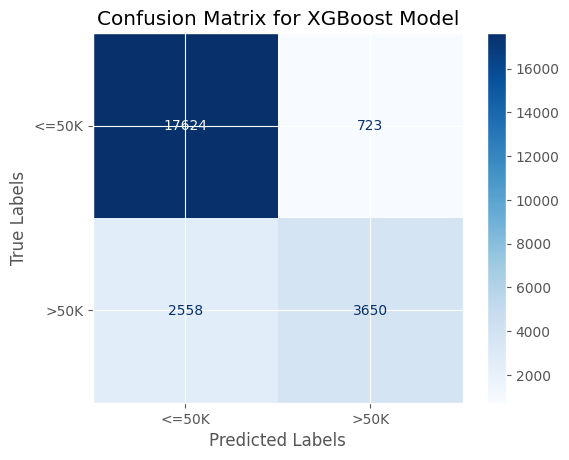

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_xgb = confusion_matrix(y_train, y_pred_train)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["<=50K", ">50K"])
disp_xgb.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for XGBoost Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


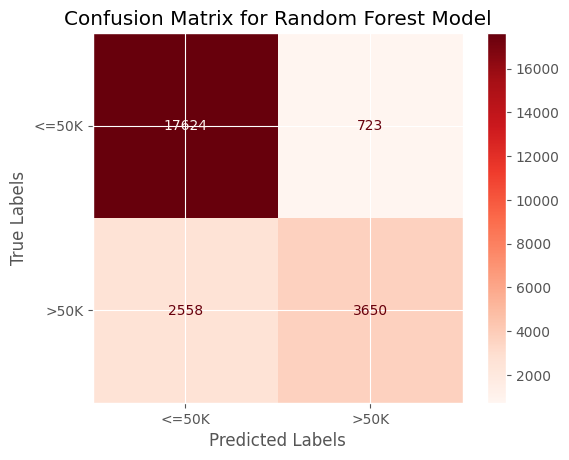

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf_train = confusion_matrix(y_train, y_pred_train)

disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=cm_rf_train, display_labels=["<=50K", ">50K"])
disp_rf_train.plot(cmap='Reds', values_format='d')
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


#### How many female employees are having income greater than $50K?

In [21]:
female_high_income = data[(new_data['sex'] == 'Female') & (data['income'] == '>50K')]
num_female_high_income = len(female_high_income)
print("Number of female employees with income > $50K:", num_female_high_income)

Number of female employees with income > $50K: 1127


In [22]:
female_employees = new_data[(new_data['sex'] == 'Female')]
female_employees.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1


In [23]:
male_employees = new_data[(new_data['sex'] == 'Male')]
male_employees.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,1
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,1
13,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,1
15,46,Private,45363,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,1


In [24]:
# male_high_income = new_data[(new_data['sex'] == 'Male') & (new_data['income'] == '>50K')]
# percentage_male_above_50k = (len(male_high_income) / male_employees) * 100
# percentage_female_above_50k = (len(female_high_income) / female_employees) * 100


In [25]:
# total_male = len(male_employees)
# total_female = len(female_employees)
# plt.figure(figsize=(8, 6))
# labels = ['Male', 'Female']
# percentages = [percentage_male_above_50k, percentage_female_above_50k]
# plt.bar(labels, percentages, color=['blue', 'pink'])
# plt.title('Percentage Distribution of Income By Gender')
# plt.xlabel('Gender')
# plt.ylabel('Percentage')
# plt.ylim(0, 100)
# plt.show()

#### How are the features in the dataset correlated?

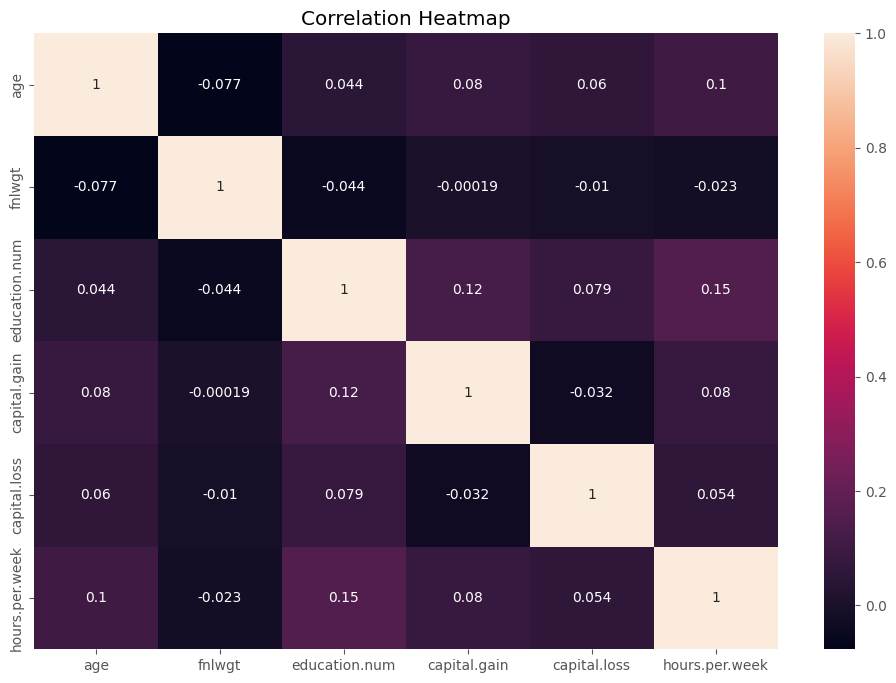

In [26]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


#### Which country has highest number of employees whose income is greater than $50K?

In [27]:
if data[data['income'] == '>50K'].empty:
    print("There are no employees earning more than $50K in the dataset.")
else:
    country_high_income = data[data['income'] == '>50K']['native.country'].value_counts().idxmax()
    num_high_income = data[data['income'] == '>50K']['native.country'].value_counts().max()
    print(f"The country with the highest number of employees earning more than $50K is {country_high_income} with {num_high_income} employees.")


The country with the highest number of employees earning more than $50K is United-States with 6995 employees.


#### What percentage of people with advanced education (Bachelors, Master’s or Doctorate) make more than 50K?

In [28]:
advanced_education = ['Bachelors', 'Masters', 'Doctorate']
advanced_education_high_income = data[(data['education'].isin(advanced_education)) & (data['income'] == '>50K')]

percentage_advanced_education_high_income = (len(advanced_education_high_income) / len(data[data['education'].isin(advanced_education)])) * 100

print(f"The percentage of people with advanced education who earn more than $50K is {percentage_advanced_education_high_income:.2f}%.")


The percentage of people with advanced education who earn more than $50K is 47.03%.


#### Which is the best performing model on your dataset? 

In [29]:
xgb_model = XGBClassifier()

parameters = {
    'max_depth': [3, 5],
    'subsample': [0.75, 0.9],
    'n_estimators': [50, 75, 100]
}

scoring = ['accuracy', 'precision', 'recall', 'f1']

clf = GridSearchCV(xgb_model,
                   parameters,
                   scoring=scoring,
                   refit='f1',
                   cv=3,
                   verbose=True,
                   n_jobs=-1)  

clf.fit(X_train_encoded, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'n_estimators': [50, 75, 100],
                         'subsample': [0.75, 0.9]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=True)

In [30]:
clf.best_score_

0.7147029375415775

In [31]:
clf.cv_results_['mean_test_f1']

array([0.70063373, 0.69495949, 0.70851422, 0.70648105, 0.71091819,
       0.70784844, 0.71006126, 0.71263957, 0.71173995, 0.7117002 ,
       0.70957559, 0.71470294])

In [32]:
rf_model = RandomForestClassifier(random_state=42)

parameters = {
    'max_depth': [3, 5],
    'max_samples': [0.75, 0.9],
    'n_estimators': [50, 75, 100]
}

scoring = ['accuracy', 'precision', 'recall', 'f1']

clf_rf = GridSearchCV(rf_model,
                   parameters,
                   scoring=scoring,
                   refit='f1',
                   cv=3,
                   verbose=True,
                   n_jobs=-1) 

clf_rf.fit(X_train_encoded, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'max_samples': [0.75, 0.9],
                         'n_estimators': [50, 75, 100]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=True)

In [33]:
clf_rf.best_score_

0.5467266787937763

In [34]:
clf_rf.cv_results_['mean_test_f1']

array([0.21028281, 0.18889943, 0.20385789, 0.21083145, 0.19349693,
       0.20100533, 0.53019907, 0.52469194, 0.53939548, 0.52555202,
       0.52103102, 0.54672668])